# **Netflix CapStone Project by Prateek aka Wolf**

**The dataset consist of 2 files one is 'combined.txt' which have**

**customer_id, ratings and movie_id in nested dictionary format , another file named as**

**'movie_titles' which contains features like movie_id, year and movie_name**

# **Questions to Deal with : -**

1. Find out the list of most popular and liked ratings.

2. Create a model that finds the best-suited movie for one user in every rating.

3. Find what movies received the best and worst ratings based on user rating.

In [1]:
# Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Loading Datasets**

In [3]:
data=pd.read_csv(r"/content/drive/MyDrive/Netflix_Capstone_Project/combined_data_1.txt",
                 header=None,names=['customer_id','ratings'],usecols=[0,1])

In [45]:
movie_titles=pd.read_csv(r"/content/drive/MyDrive/Netflix_Capstone_Project/movie_titles.csv",
                         encoding='ISO-8859-1',names=['Movie_ID','Year','Movie_Name'],
                         header=None,usecols=[0,1,2])

In [46]:
movie_titles.head()

,Movie_ID,Year,Movie_Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW


In [4]:
data.head(10)

,customer_id,ratings
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
5,823519,3.0
6,893988,3.0
7,124105,4.0
8,1248029,3.0
9,1842128,4.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24058263 entries, 0 to 24058262
Data columns (total 2 columns):
 #   Column       Dtype  
---  ------       -----  
 0   customer_id  object 
 1   ratings      float64
dtypes: float64(1), object(1)
memory usage: 367.1+ MB


In [6]:
data.isnull().sum()

,0
customer_id,0
ratings,4499


# checking the counts in dataset 'data'

In [7]:
# movies in dataset
movie_count=data.isnull().sum()['ratings']
print(f"Movies Count : {movie_count}")

Movies Count : 4499


In [8]:
# as customer id contains the values movies id such as 1: ,2: ..... therefore a we need to calculate the customer_count
customer_id_count=data['customer_id'].nunique()
customer_count=customer_id_count - movie_count
print(f"Customer_Count : {customer_count}")

Customer_Count : 470758


In [9]:
# creating a variable for rating_counts
rating_count=data['ratings'].count() - movie_count
print(f"Rating_Counts : {rating_count}")

Rating_Counts : 24049265


**VISUALIZATION OF RATINGS AS PER USERS**

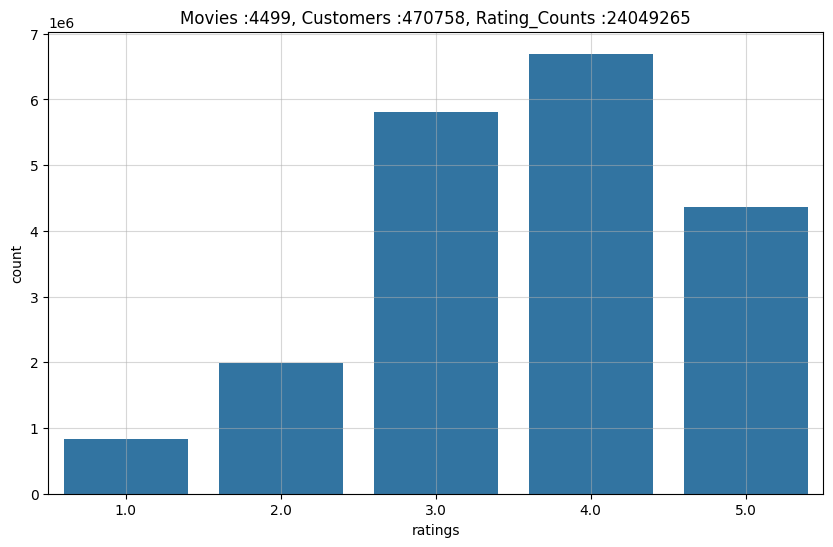

In [52]:
# let's visuaize the rating
stars=data.groupby(by='ratings')['ratings'].agg(['count'])

# visualize
plt.figure(figsize=(10,6))
sns.barplot(data=stars,x='ratings',y='count')
plt.title(f"Movies :{movie_count}, Customers :{customer_count}, Rating_Counts :{rating_count}")
plt.grid(alpha=0.50)
plt.show()

In [11]:
# as our customer_id column consist 1:,2:..... which is something referes to the movie ids so let's create new feature
z=None
movie_nps=[]
for i in data['customer_id']:
    if ':' in i:
        z=int(i.replace(':',''))
    movie_nps.append(z)

data['Movie_ID']=movie_nps

In [12]:
data.shape

(24058263, 3)

In [13]:
# removing the null values

data.isnull().sum()

,0
customer_id,0
ratings,4499
Movie_ID,0


In [14]:
data.dropna(inplace=True)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24053764 entries, 1 to 24058262
Data columns (total 3 columns):
 #   Column       Dtype  
---  ------       -----  
 0   customer_id  object 
 1   ratings      float64
 2   Movie_ID     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 734.1+ MB


In [16]:
# converting customer_id into int type
data['customer_id']=data['customer_id'].astype('int64')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24053764 entries, 1 to 24058262
Data columns (total 3 columns):
 #   Column       Dtype  
---  ------       -----  
 0   customer_id  int64  
 1   ratings      float64
 2   Movie_ID     int64  
dtypes: float64(1), int64(2)
memory usage: 734.1 MB


In [18]:
print(f"Dataset size : {data.shape}")

Dataset size : (24053764, 3)


# **1. Find out the list of most popular and liked ratings.**

In [82]:
# most popular movies with 5 star ratings
five_star_rating=data[data['ratings']==5]
five_star_rating=five_star_rating.groupby(by='Movie_ID')['Movie_ID'].agg(['count'])

# MOST POPULAR MOVIES
most_popular=pd.merge(movie_titles,five_star_rating,on='Movie_ID')
print("-*-*-*-*-*-*-*--MOST POPULAR MOVIES HAVING 5 STARS RATING--*-*-*-*-*-*-")
most_popular.sort_values('count',ascending=False).head(10)

-*-*-*-*-*-*-*--MOST POPULAR MOVIES HAVING 5 STARS RATING--*-*-*-*-*-*-


,Movie_ID,Year,Movie_Name,count
986,2452,2001.0,Lord of the Rings: The Fellowship of the Ring,76342
1579,3962,2003.0,Finding Nemo (Widescreen),61541
763,1905,2003.0,Pirates of the Caribbean: The Curse of the Bla...,59941
1716,4306,1999.0,The Sixth Sense,57485
1104,2782,1995.0,Braveheart,54176
1131,2862,1991.0,The Silence of the Lambs,52534
1569,3938,2004.0,Shrek 2,46290
236,571,1999.0,American Beauty,43503
1303,3290,1974.0,The Godfather,34155
1445,3624,2003.0,The Last Samurai,31841


In [77]:
# most rated movies by users
most_rated=data.groupby(by='Movie_ID')['Movie_ID'].agg(['count'])

# MOST RATED MOVIES IN NETFLIX
most_rated_movies=pd.merge(movie_titles,most_rated,on='Movie_ID')
print("*******************\\\MOST RATED MOVIES BY USERS//*******************")
most_rated_movies.sort_values('count',ascending=False).head(10)

*******************\\MOST RATED MOVIES BY USERS//*******************


,Movie_ID,Year,Movie_Name,count
763,1905,2003.0,Pirates of the Caribbean: The Curse of the Bla...,142993
986,2452,2001.0,Lord of the Rings: The Fellowship of the Ring,121278
236,571,1999.0,American Beauty,120186
1716,4306,1999.0,The Sixth Sense,119073
1532,3860,2003.0,Bruce Almighty,118609
1773,4432,2003.0,The Italian Job,113853
1569,3938,2004.0,Shrek 2,112016
1579,3962,2003.0,Finding Nemo (Widescreen),111102
1131,2862,1991.0,The Silence of the Lambs,109025
1104,2782,1995.0,Braveheart,106472


# **2. Create a model that finds the best-suited movie for one user in every rating.**

# **Pre-Filtering**
**1. filtering those movies which are less rated**

**2. filteriing those users which rated less movies**

In [ ]:
# Filtering the movies which are less rated , let's create a benchmark for the movie rating

movie_summary=data.groupby(by='Movie_ID')['Movie_ID'].agg(['count'])
movie_benchmark=round(movie_summary['count'].quantile(0.60))
print(f"Movie_Benchmark : {movie_benchmark}")

# drop the movie which do not satisfies the movie_benchmark
movie_drop_list=movie_summary[movie_summary['count']<movie_benchmark].index
print(f"No. of movies in drop_list : {len(movie_drop_list)}")

# Actual movie count
Actual_movies_count=movie_count - len(movie_drop_list)
print(f"Actual Movies count after removing from drop_list : {Actual_movies_count}")

In [ ]:
# Filtering on the basis of the users who rated less movies

customer_summary=data.groupby(by='customer_id')['customer_id'].agg(['count'])
customer_benchmark=round(customer_summary['count'].quantile(0.60))
print(f"Customer_Benchmark : {customer_benchmark}")

# dropping the customer which does'nt meet the benchmarks
customer_drop_list=customer_summary[customer_summary['count']<customer_benchmark].index
print(f"No. of customers in drop_list : {len(customer_drop_list)}")

# Actual customers left
Actual_customers= customer_count - len(customer_drop_list)
print(f"Actual customers after segregating : {Actual_customers}")

In [21]:
# removing these customer_id and movie_id from the dataset
print(f"Dataset size before : {data.shape}")

data=data[~data['Movie_ID'].isin(movie_drop_list)]
data=data[~data['customer_id'].isin(customer_drop_list)]

print(f"Dataset size after trimming : {data.shape}")

Dataset size before : (24053764, 3)
Dataset size after trimming : (19695836, 3)


# **Installing Surprise**

**The Surprise library in python is used for building and analyzing recommendation system**

In [24]:
#! pip install scikit-surprise

In [25]:
import surprise

In [28]:
from surprise import SVD,Dataset,Reader
from surprise.model_selection import cross_validate

# **model building**

In [30]:
reader=Reader()
data_01=Dataset.load_from_df(data[['customer_id','Movie_ID','ratings']][:100000],reader)

model=SVD()
cross_validate(model,data_01,measures=['RMSE','MAE'],cv=3)

{'test_rmse': array([1.02041778, 1.01685897, 1.0199847 ]),
 'test_mae': array([0.80892602, 0.80444018, 0.81087235]),
 'fit_time': (1.0417487621307373, 1.0264701843261719, 1.047652006149292),
 'test_time': (0.13592219352722168, 0.34282660484313965, 0.3228168487548828)}

**taking a random user by using random library**

In [41]:
import random
random.seed(10)

print(f"Random Customer ID : {random.choice(data['customer_id'])}")

Random Customer ID : 452212


**creating user_452212 dataset**

In [47]:
# now taking 452212 as a random customer id and predicting the best search movie

user_452212_rating=data[data['customer_id']==452212]
user_452212_rating['Movie_ID'].nunique()

90

In [49]:
user_452212=movie_titles.copy()

# now dropping the movies which are not rated much from the user movie list
user_452212=user_452212[~user_452212['Movie_ID'].isin(movie_drop_list)]

# now predicting the Estimate Score for movies for user_452212
user_452212['Estimate_Score']=user_452212['Movie_ID'].apply(lambda x: model.predict(452212,x).est)
user_452212

<ipython-input-49-f12189b0b2bf>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_452212['Estimate_Score']=user_452212['Movie_ID'].apply(lambda x: model.predict(452212,x).est)


,Movie_ID,Year,Movie_Name,Estimate_Score
2,3,1997.0,Character,3.641550
4,5,2004.0,The Rise and Fall of ECW,3.916841
5,6,1997.0,Sick,3.154713
7,8,2004.0,What the #$*! Do We Know!?,3.218305
15,16,1996.0,Screamers,3.120266
...,...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...,3.585282
17766,17767,2004.0,Fidel Castro: American Experience,3.585282
17767,17768,2000.0,Epoch,3.585282
17768,17769,2003.0,The Company,3.585282


In [50]:
# suggesting top 10 movies for user_452212

top_10_movies=user_452212.sort_values('Estimate_Score',ascending=False).head(10)
print("Top 10 Movies for user_452212")
top_10_movies

Top 10 Movies for user_452212


,Movie_ID,Year,Movie_Name,Estimate_Score
24,25,1997.0,Inspector Morse 31: Death Is Now My Neighbour,3.985141
4,5,2004.0,The Rise and Fall of ECW,3.916841
17,18,1994.0,Immortal Beloved,3.865580
27,28,2002.0,Lilo and Stitch,3.853108
29,30,2003.0,Something's Gotta Give,3.719533
2,3,1997.0,Character,3.641550
12745,12746,1979.0,Starting Over,3.585282
12750,12751,2002.0,Wendigo,3.585282
12749,12750,1954.0,Indiscretion of an American Wife,3.585282
12748,12749,1993.0,Carnosaur,3.585282


# **3. Find what movies received the best and worst ratings based on user rating.**

In [78]:
# worst rating==1.0 and Best Rating==5.0
worst_rating=data[data['ratings']==1]
worst_rating=worst_rating.groupby(by='Movie_ID')['Movie_ID'].agg(['count'])

worst_movies=pd.merge(movie_titles,worst_rating,on='Movie_ID')
print('Worst 10 Movies are : ----')
worst_movies.sort_values('count',ascending=True).head(10)

Worst 10 Movies are : ----


,Movie_ID,Year,Movie_Name,count
1510,3804,1983.0,The Star Chamber,16
1777,4449,2002.0,The Inspector Lynley Mysteries: For the Sake o...,18
380,947,1965.0,The Cincinnati Kid,19
345,839,1945.0,The Thin Man Goes Home,19
740,1840,1950.0,The Asphalt Jungle,21
617,1531,1996.0,The Crucible,21
260,641,1968.0,Charly,22
637,1596,1954.0,The High and the Mighty,22
162,410,1998.0,Frank Lloyd Wright,22
915,2299,1941.0,Shadow of the Thin Man,23


In [80]:
best_rating=data[data['ratings']==5]
best_rating=best_rating.groupby(by='Movie_ID')['Movie_ID'].agg(['count'])

best_movies=pd.merge(movie_titles,best_rating,on='Movie_ID')
print("Best 10 Movies are : -------")
best_movies.sort_values('count',ascending=False).head(10)

Best 10 Movies are : -------


,Movie_ID,Year,Movie_Name,count
986,2452,2001.0,Lord of the Rings: The Fellowship of the Ring,76342
1579,3962,2003.0,Finding Nemo (Widescreen),61541
763,1905,2003.0,Pirates of the Caribbean: The Curse of the Bla...,59941
1716,4306,1999.0,The Sixth Sense,57485
1104,2782,1995.0,Braveheart,54176
1131,2862,1991.0,The Silence of the Lambs,52534
1569,3938,2004.0,Shrek 2,46290
236,571,1999.0,American Beauty,43503
1303,3290,1974.0,The Godfather,34155
1445,3624,2003.0,The Last Samurai,31841
